The main objective of this project is to visualize whether there is a gender gap among various college degrees.We will compare share of degrees obtained by women and man in all 17 majors.

## Data Source

The data is originally from the Department of Education Statistics. It includes the percentage of bachelor's degrees granted to women from 1970 to 2012 and is broken up into 17 categories of degrees, with each column as a seperate category. The data is clened by Randal Olson, a data scientist at the University of Pennsylvania. 

## Data Preview

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degree=pd.read_csv("C:/Users/Jesse/Desktop/Dataset/percent-women-degree-usa.csv")
women_degree.head()


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Visualization: Gender Gap

Let us visualize the gender gaps among all majors.We can divide the 17 majors into 3 categories STEM, Liberal Arts and Other categories.

STEM: Psychology, Biology, Math and Statistics,Physical Sciences, Computer Science, Engineering.
Liberal Arts: Foreign Languages, English, Communications and Journalism, Art and Performance, Social Sciences and History
Other categories: Health Professions, Public Administration, Education, Agriculture, Business, Architecture

We are interested in the following questions:

* Does the gender gap exist in all three categories? 
* Which category and major has the highest gender gap?
* How did the gender gap change over time? 

We will create line charts to view the gender gap, and order line charts by decreasing gender gap.

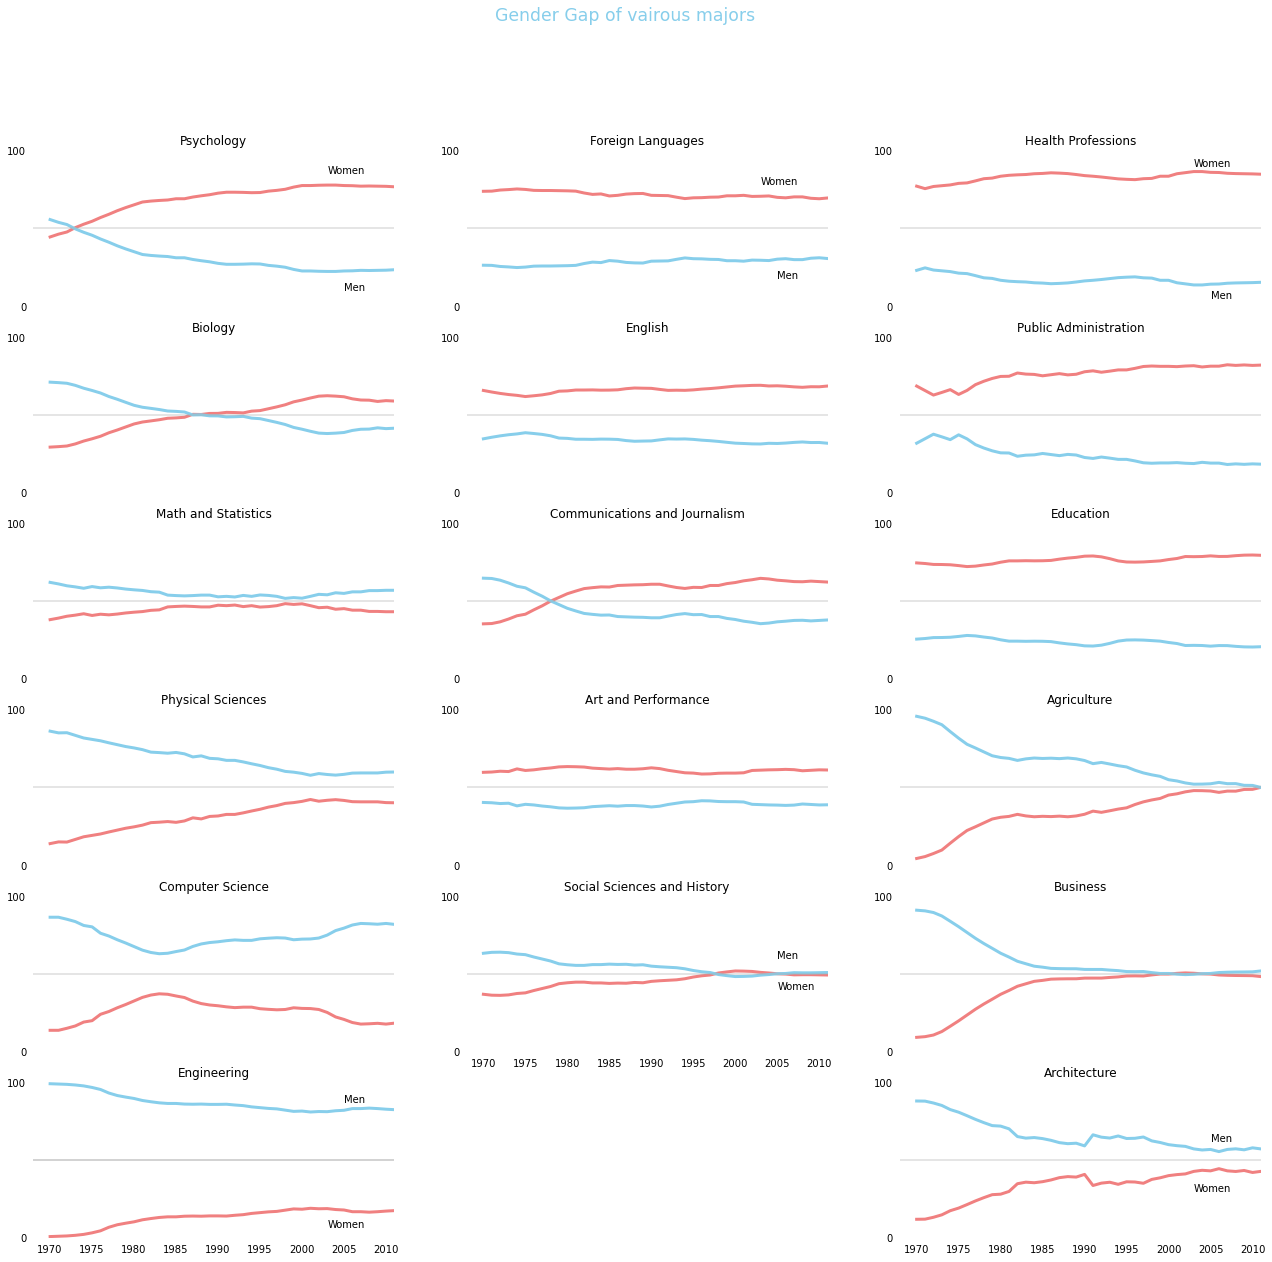

In [34]:
#Three Categories

stem = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
lc=(240/255,128/255,128/255)
sb=(135/255,206/255,235/255)


fig=plt.figure(figsize=(22,20))
fig.suptitle('Gender Gap of vairous majors ',size='xx-large', c=sb)

for row in range(0,6):
    for c in range(0,3):
        if c==1 and row==5:
            None
        else:
            ax=fig.add_subplot(6,3,1+c+row*3)
        # STEM Degrees (1st column)
            if c==0:
                ax.plot(women_degree['Year'],women_degree[stem[row]],c=lc,label="Women",linewidth=3)
                ax.plot(women_degree['Year'],100-women_degree[stem[row]],c=sb,label="Men",linewidth=3)
                ax.set_title(stem[row])
        # Liberal Arts Degrees (2nd column)
            elif c==1 and row<5:
                ax.plot(women_degree['Year'],women_degree[lib_arts[row]],c=lc,label="Women",linewidth=3)
                ax.plot(women_degree['Year'],100-women_degree[lib_arts[row]],c=sb,label="Men",linewidth=3)
                ax.set_title(lib_arts[row])
        # Other Category (3rd column) 
            else: 
                ax.plot(women_degree['Year'],women_degree[other_cats[row]],c=lc,label="Women",linewidth=3)
                ax.plot(women_degree['Year'],100-women_degree[other_cats[row]],c=sb,label="Men",linewidth=3)
                ax.set_title(other_cats[row])
        # Hide all spines
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        # Set limits for x and y axis
        ax.set_xlim(1968,2011)
        ax.set_ylim(0,100)
        # Hide tick marks and x-labels
        ax.tick_params(bottom=False, top=False, left=False, right=False)

        # limit all y-axis labels to only 0 and 100
        ax.set_yticks([0,100])
        # Add middle line in a RGB model shade of gray, alpha is the transparency
        ax.axhline(50,c=(171/255,171/255,171/255),alpha=0.3,linewidth=2)
        
        # Add line labels at (x,y)
        # STEM Category
        if c==0:
            if row==0:
                ax.text(2003,85,'Women')
                ax.text(2005,10,'Men')
            elif row==5:
                ax.text(2005,87,'Men')
                ax.text(2003,7,'Women')
              
        # Liberal Arts Category
        elif c==1:
            if row==0:
                ax.text(2003,78,'Women')
                ax.text(2005,18,'Men')
            elif row==4:
                ax.text(2005,40,'Women')
                ax.text(2005,60,'Men')
        # Other Category
        elif c==2:
            if row==0:
                ax.text(2003,90,'Women')
                ax.text(2005,5,'Men')
            elif row==5:
                ax.text(2003,30,'Women')
                ax.text(2005,62,'Men')
        # Remove all x labels except the last row
        if (c == 0 and row < 5) or (c == 1 and row < 4) or (c == 2 and row < 5):
            ax.tick_params(labelbottom=False)

# Save plot area as .png
plt.savefig('gender_gaps.png')
plt.show()

        

## General Finding

#### STEM

As we can see from the first column of the figure, the percentage of women tends to be higher than men in Psychology and Biology majors.In the Math and Statistics and Physical Sciences majors, the percentage of women is gradually increasing and approaching to the same percentage of men. In other words, the gender gap is shrinking. However, the gender gaps in computer science and Engineering are large since 1970, and there are no tendencies that the gender gaps in these two majors were about to shrink.

#### Liberal Arts

As compared to the STEM category, the result of Liberal Arts is quite opposite.From the second column of the firgure, the percentage of women is higher than men in all majors in this category except the social sciences and history major; they all remain a stable gender gap over the time. However, the gender gap of social sciences and history major was shrinking staring from 1970 and there was almost no gender gap in 2011.

#### Other Category

From the third column, we can see that the percentage of women is higher than men in health professions, Public Administration and Education from 1970 to 2011 and the gender gaps are quite stable. The gender gaps in Agriculture, business and Architecture ware shrinking over the time; Until 2011, the three gender gaps were almost approaching to 0.